<a href="https://colab.research.google.com/github/dhananjaykalburgi/dhananjay/blob/master/Lab1Data_Exploration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1: Data Exploration of Traveler dataset

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Exploration by a Data Analysist:
   
   - Is there any mistakes in the data?
   - Does the data have peculiar behavior?
   - Do I need to fix or remove any of the data to be more realistic?


In [8]:
#Lets load data from train and test datasets

train_users = pd.read_csv('/content/drive/MyDrive/DMA/train_users_2.csv')
test_users = pd.read_csv('/content/drive/MyDrive/DMA/test_users.csv')

In [12]:
## How many users are in training set and test set

print("We have", train_users.shape[0], "users in the training set and", test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [15]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis = 0, ignore_index = True, sort = False)
users.head(10)

#If True, do not use the index values along the concatenation axis. The resulting axis will be labeled 0, …, n - 1. 
#This is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [16]:
# Remove ID's since, we are not interested in making predictions with ids
users.drop('id',axis = 1, inplace = True) #“axis 0” represents rows and “axis 1” represents columns
users.head(10)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


### Untouched missing data
 - **Viewing the data:** gender attribute has certain values being **-unknown-**. 
 - Transform these values into **NaN**.
    

In [17]:
users.gender.head()

0    -unknown-
1         MALE
2       FEMALE
3       FEMALE
4    -unknown-
Name: gender, dtype: object

#### Exercise 1:
 - Replace -unknown- with NaN

In [18]:
### Start code

users.gender.replace('-unknown-',np.nan,inplace=True)
### End code

In [19]:
users.gender.head()

0       NaN
1      MALE
2    FEMALE
3    FEMALE
4       NaN
Name: gender, dtype: object

#### How much data we are missing?

In [ ]:
## Compute NaN percentage of each feature (attribute).
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

date_first_booking         67.733998
gender                     46.990169
age                        42.412365
first_affiliate_tracked     2.208335
country_destination        22.535538
dtype: float64

#### Analysis: 
- ???


#### Exercise 2:
   - What is the NaN percentage of **date_first_booking** and **age** attribute in test_users dataset

In [20]:
### Start code
x1=(test_users.date_first_booking.isnull().sum() / test_users.shape[0]) * 100
y1=(test_users.age.isnull().sum()  / test_users.shape[0]) * 100 

print("date_first_booking = ",x1)
print("age = ",y1)

#replace the "date_first_booking" with to get NaN percentage wrt "Age"
### End code 

date_first_booking =  100.0
age =  46.50219015717599


### Missing data
 - **Viewing the data:** age attribute has certain values being **-unknown-**. 
 - Transform these values into **NaN**.
    

In [ ]:
## age
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

#### Exercise 3:
   - Display total number of users whose **age** is > 122 and < 18

In [21]:
### Start code
print(sum(users.age>122))
print(sum(users.age<18))

### End code

830
188


#### Statistical analysis of age attribute with value > 122 and < 18

In [22]:
users[users.age > 122]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [23]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

#### Analysis: 
- ???


#### Exercise 4:
   - Set an acceptable range (95, 18) and put others as NaN in **age**

In [ ]:
### Start code

users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 18, 'age'] = np.nan
### End code
users['age']
#print(sum(users.age<18))


0          NaN
1         38.0
2         56.0
3         42.0
4         41.0
          ... 
275542    31.0
275543     NaN
275544     NaN
275545     NaN
275546    49.0
Name: age, Length: 275547, dtype: float64

### Now, lets focus on CATEGORICAL data types

In [24]:
users.columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination'],
      dtype='object')

In [25]:
categorical_features = ['affiliate_channel','affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method']

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

#### Date formating

In [26]:
users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [27]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active)// 1000000, format='%Y%m%d')
users['date_first_active']

0        2009-03-19
1        2009-05-23
2        2009-06-09
3        2009-10-31
4        2009-12-08
            ...    
275542   2014-09-30
275543   2014-09-30
275544   2014-09-30
275545   2014-09-30
275546   2014-09-30
Name: date_first_active, Length: 275547, dtype: datetime64[ns]

In [28]:
users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


### Data Visualization

#### [1] Gender

#### Exercise 5:
 - Plot figure as shown below

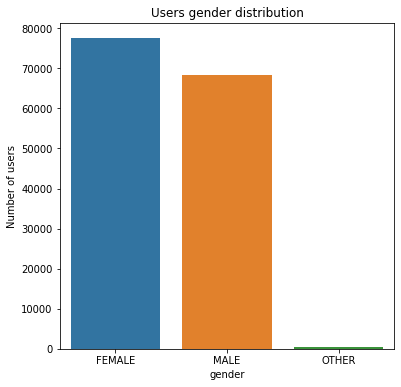

<Figure size 432x288 with 0 Axes>

In [30]:
## Start code
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=users)
plt.ylabel('Number of users')
plt.xlabel('gender')
plt.title('Users gender distribution')
plt.show()

sns.despine()
## End code


#### Expected graph:
<img src="./eda_images/gender.png" height="400" width="400"/>

#### Exercise 6:
- Is there any **gender** preferences when travelling to destination country?
- Plot figure as shown below


In [31]:
users.gender.unique()

[NaN, 'MALE', 'FEMALE', 'OTHER']
Categories (3, object): ['MALE', 'FEMALE', 'OTHER']

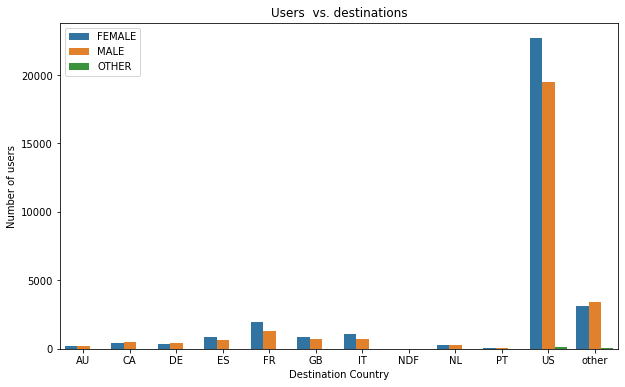

In [ ]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

users['country destination']= users.country_destination.sort_values()
users_without_NDF = users[users['country_destination']!='NDF']

plt.figure(figsize=(10,6))

sns.countplot(x='country_destination', data = users_without_NDF, hue = 'gender')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users  vs. destinations')
plt.legend(loc='upper left')
plt.show()

#### Expected graph:

<img src="./eda_images/destination_country.png" height="400" width="400"/>

### [2] Age

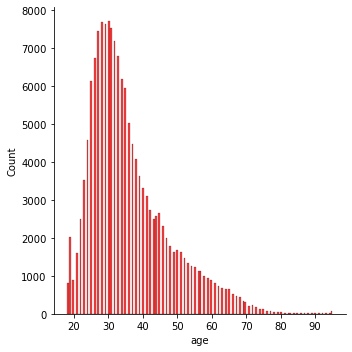

In [ ]:
sns.displot(users.age.dropna(), color='red')
plt.xlabel('age')
sns.despine()

#### Analysis: The common age of travelers is between 20 and 50.
   - How about older people, do they travel in a different way?    

#### Exercise 7:
   - Lets take arbitrary **age** (eg: 45) and split into two groups, namely, *Young* and *Old* based on **country_destination**.
   - Plot figure as shown below.

In [ ]:
age = 45

### Start code 






## End code

##Plot
## Start code







## End code
sns.despine()
plt.show()

<Figure size 432x288 with 0 Axes>

#### Expected graph:

<img src="./eda_images/young_old.png" height="400" width="400"/>

#### Analysis: 
    
   - ???
        

#### Exercise 8:
   - What about native language if 'en', what percentage ? 

In [ ]:
### Start code


### End code

### [3] Dates

#### Plot number of user accounts created over time


<AxesSubplot:>

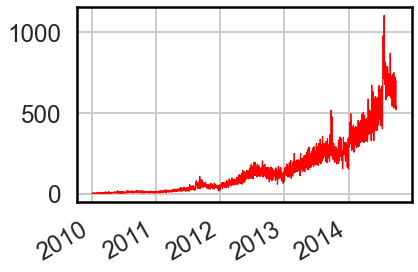

In [ ]:

sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='red')


#### Analysis: 

- We observe how fast the traveler site has grown over the last few years. 
- Does this corelate with the date when the user was active for the first time? 
- **Exercise 9:** It might be similar, how to check the data!


In [ ]:
### Start code


### End code

#### Analysis: 
   - We see almost same results as **date_account_created**.
   - Lets dig in peaks for more details.
    

#### Plot for year 2013 - date_account_created and date_first_active

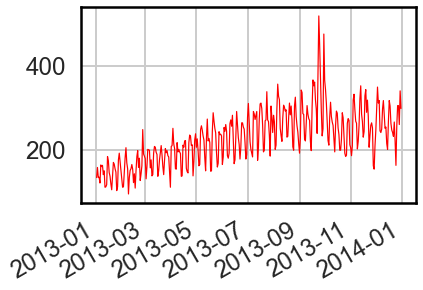

In [ ]:
## Select 2013 year for date_account_created

users_2013_a = users[users['date_account_created'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013_a = users_2013_a[users_2013_a['date_account_created'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013_a.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='red')
plt.show()


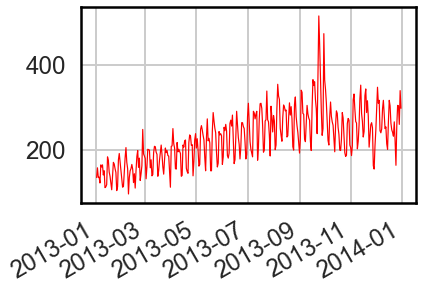

In [ ]:
## Select 2013 year for date_first_active

users_2013 = users[users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='red')
plt.show()

#### Analysis:
  - Small patterns: some peaks at Oct. - Nov.
  - **Exercise 10:** Lets look more closely, in particular days
    

In [ ]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

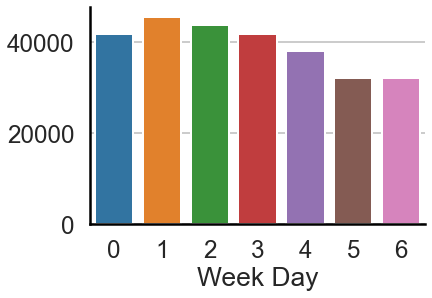

In [ ]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

#### Exercise 11: HW 
- Can you find some distinctions between **date_first_active** and **date_account_created** relating to **country_destination**?


#### Exercise 12: HW 
- Are there more registrations but less booking?

#### Exercise 13: HW 
- Does it make sense to find where do users stay when they book 'US'?

#### Exercise 14: HW 
- Try making plots about **devices** and **signups** for analysis

#### Exercise 15: HW 
- Raise many more questions and provide your analysis on rest of the attributes